In [1]:
#!pip install opencv-python
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Load the mnist handwritten digits dataset
mnist=tf.keras.datasets.mnist
# Split the dataset into training and testing sets
(x_train,y_train),(x_test,y_test)=mnist.load_data()
# Normalize the training and testing sets, i.e. scale the values to be between 0 and 1 from 0 to 255
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
# checking shape of images
x_train[0].shape

(28, 28)

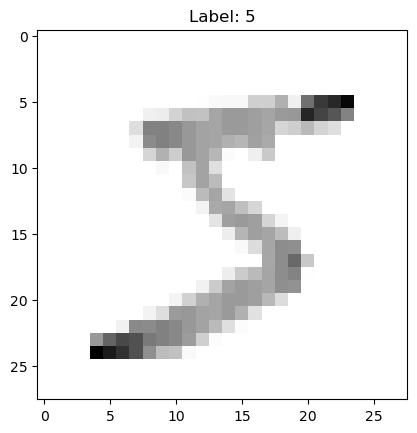

In [3]:
# Plot the first image in the dataset
plt.imshow(x_train[0], cmap='binary')
#cmap='binary' is used to display the image in black and white where ze
plt.title(f'Label: {y_train[0]}')
plt.show()

In [4]:
x_train[0][6]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05780486, 0.06524513,
       0.16128198, 0.22713296, 0.22277047, 0.32790981, 0.36833534,
       0.3689874 , 0.34978968, 0.32678448, 0.368094  , 0.3747499 ,
       0.79066747, 0.67980478, 0.61494005, 0.45002403, 0.        ,
       0.        , 0.        , 0.        ])

we can see that, 0 means white and 1 means black in the dataset images. i.e., inverted colors.

In [5]:
#create a CNN model
#input size is 28*28

model=tf.keras.models.Sequential()
#add shaping layer
model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,))) #CNN takes 3D input so we reshape it to 28*28*1 height*width*channels
model.add(tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')) #input layer 64 neurons/filters each with 3*3 kernel size and relu activation function
#size of output is 28*28*64
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #pooling layer
#size of output is 14*14*64

model.add(tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')) #hidden layer
#size of output is 14*14*64
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #pooling layer
#size of output is 7*7*64

model.add(tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')) #hidden layer
#size of output is 7*7*64 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #pooling layer
#size of output is 3*3*64

model.add(tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')) #hidden layer
#size of output is 3*3*64
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #pooling layer
#size of output is 1*1*64

model.add(tf.keras.layers.Flatten()) #flatten layer
#size of output is 64

#give this to artificial neural network of 1 hidden and 1 output layer
model.add(tf.keras.layers.Dense(64,activation='relu')) #hidden layer
#size of output is 64
model.add(tf.keras.layers.Dense(10,activation='softmax')) #output layer
#size of output is 10

In [6]:
#lets do k fold cross validation 
#k fold cross validation is used to check the accuracy of the model
#it is used to check whether the model is overfitting or not
x_train=np.array(x_train)
y_train=np.array(y_train)
#divide the data into k=4 folds
k=4
num_val_samples=len(x_train)//k
# epoch means the model will be trained 2 times on the same data
num_epochs=2
all_scores=[]
for i in range(k):
    print('processing fold #',i)
    val_data=x_train[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=y_train[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data=np.concatenate([x_train[:i*num_val_samples],x_train[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets=np.concatenate([y_train[:i*num_val_samples],y_train[(i+1)*num_val_samples:]],axis=0)
    # using adam optimizer and sparse_categorical_crossentropy loss function
    #loss function sparse_categorical_crossentropy for multiclass classification
    #it is a probability distribution of classes and not one hot encoded
    #sparse_categorical_crossentropy is used when labels are not one hot encoded 
    #one hot encoded labels are like [0,0,0,0,0,0,0,0,0,1] for 9
    #sparse_categorical_crossentropy is used when labels are like 9
    #metrics is used to measure accuracy
    #other loss functions are mean_squared_error for regression and binary_crossentropy for binary classification
    #other metrics are accuracy,precision,recall
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    # training the model
    model.fit(partial_train_data,partial_train_targets,epochs=num_epochs)
    # validating the model
    val_loss,val_acc=model.evaluate(val_data,val_targets)
    all_scores.append(val_acc)
print(all_scores)

processing fold # 0
Epoch 1/2
1407/1407 [==============================] - 41s 28ms/step - loss: 0.2339 - accuracy: 0.9255
Epoch 2/2
469/469 [==============================] - 4s 9ms/step - loss: 0.0513 - accuracy: 0.9843
processing fold # 1
Epoch 1/2
1407/1407 [==============================] - 40s 28ms/step - loss: 0.0523 - accuracy: 0.9842
Epoch 2/2
469/469 [==============================] - 4s 9ms/step - loss: 0.0396 - accuracy: 0.9863
processing fold # 2
Epoch 1/2
1407/1407 [==============================] - 41s 28ms/step - loss: 0.0320 - accuracy: 0.9900
Epoch 2/2
469/469 [==============================] - 5s 11ms/step - loss: 0.0344 - accuracy: 0.9896
processing fold # 3
Epoch 1/2
1407/1407 [==============================] - 43s 30ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 2/2
469/469 [==============================] - 5s 10ms/step - loss: 0.0301 - accuracy: 0.9917
[0.9842666387557983, 0.9862666726112366, 0.9896000027656555, 0.9917333126068115]


as it can be seen, model is performing almost same for all folds

In [7]:
model.save('num_predict.model') #saving the model

INFO:tensorflow:Assets written to: num_predict.model\assets


INFO:tensorflow:Assets written to: num_predict.model\assets


In [8]:
# validating the model on the test data, which the model has never seen before
model=tf.keras.models.load_model('num_predict.model') #loading the model
loss,accuracy=model.evaluate(x_test,y_test) #evaluating the model

313/313 [==============================] - 3s 10ms/step - loss: 0.0332 - accuracy: 0.9900


and it is even performing better for unseen data

1/1 [==============================] - 0s 89ms/step
The number is probably a: 2
confidence (0 to 1):  1.0


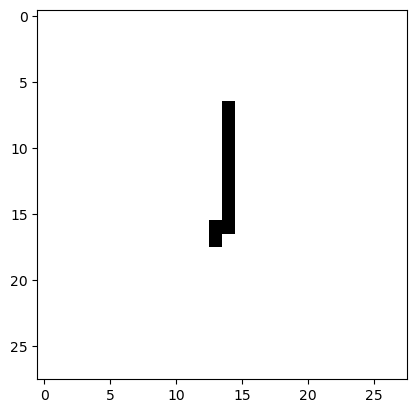

1/1 [==============================] - 0s 10ms/step
The number is probably a: 2
confidence (0 to 1):  1.0


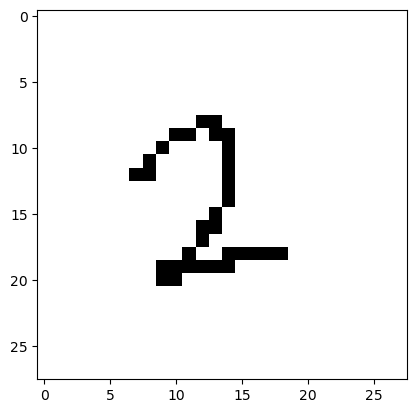

1/1 [==============================] - 0s 13ms/step
The number is probably a: 9
confidence (0 to 1):  1.0


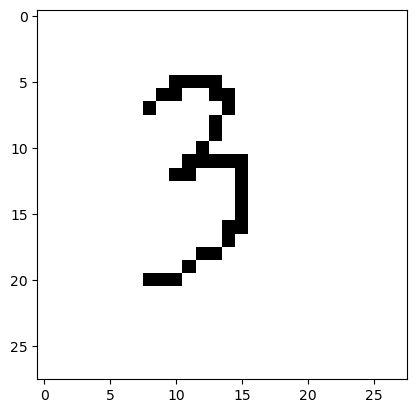

1/1 [==============================] - 0s 11ms/step
The number is probably a: 6
confidence (0 to 1):  1.0


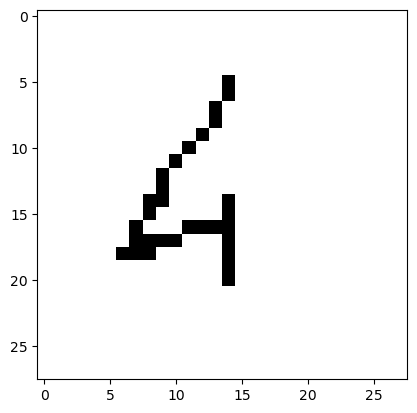

1/1 [==============================] - 0s 18ms/step
The number is probably a: 5
confidence (0 to 1):  1.0


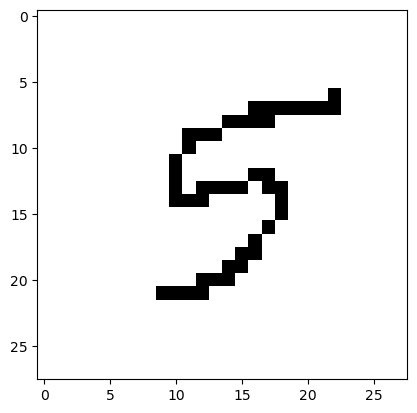

1/1 [==============================] - 0s 17ms/step
The number is probably a: 6
confidence (0 to 1):  1.0


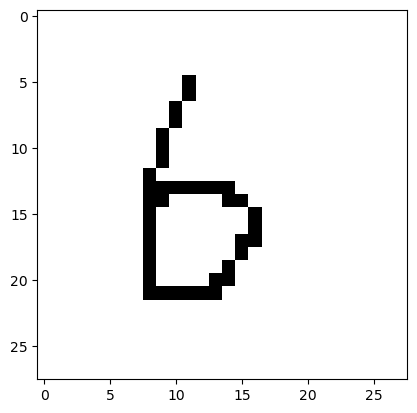

1/1 [==============================] - 0s 12ms/step
The number is probably a: 7
confidence (0 to 1):  1.0


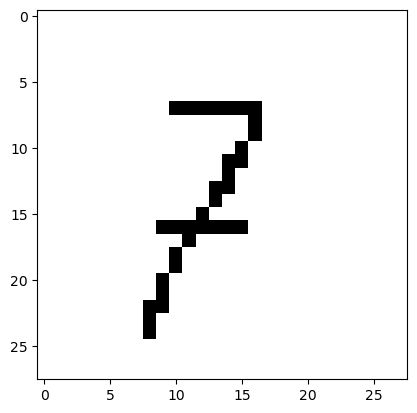

1/1 [==============================] - 0s 23ms/step
The number is probably a: 8
confidence (0 to 1):  1.0


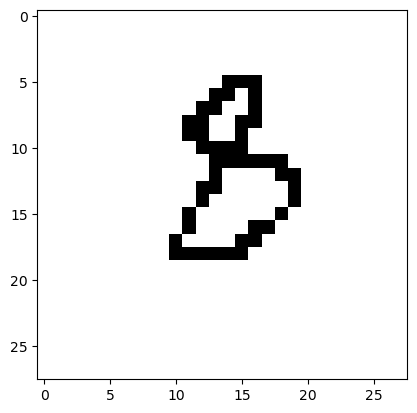

1/1 [==============================] - 0s 14ms/step
The number is probably a: 9
confidence (0 to 1):  1.0


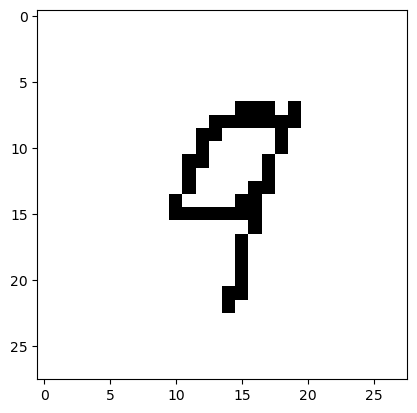

1/1 [==============================] - 0s 16ms/step
The number is probably a: 0
confidence (0 to 1):  1.0


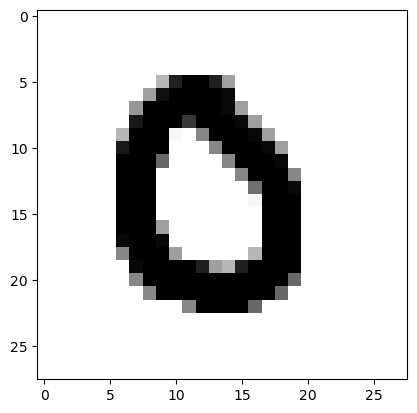

1/1 [==============================] - 0s 11ms/step
The number is probably a: 1
confidence (0 to 1):  1.0


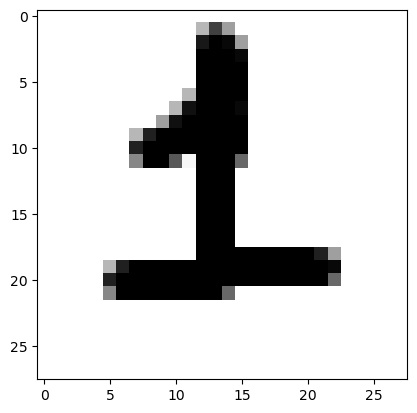

1/1 [==============================] - 0s 15ms/step
The number is probably a: 2
confidence (0 to 1):  1.0


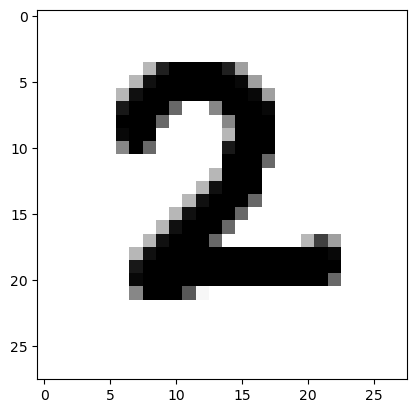

1/1 [==============================] - 0s 47ms/step
The number is probably a: 3
confidence (0 to 1):  1.0


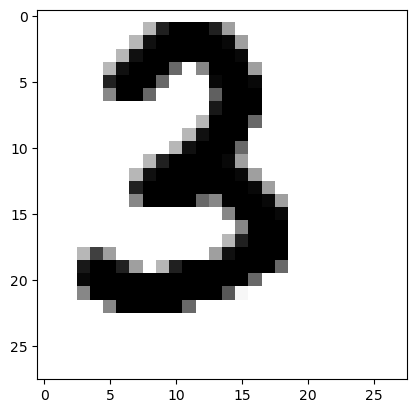

1/1 [==============================] - 0s 20ms/step
The number is probably a: 4
confidence (0 to 1):  1.0


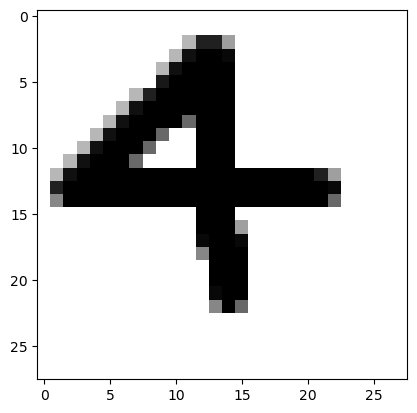

1/1 [==============================] - 0s 18ms/step
The number is probably a: 5
confidence (0 to 1):  1.0


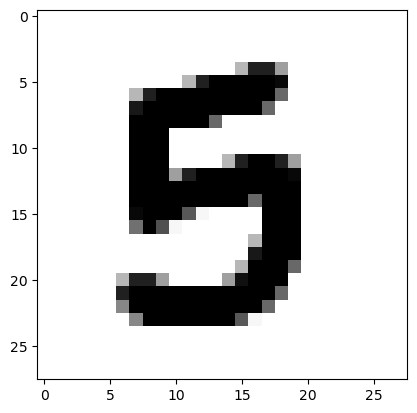

1/1 [==============================] - 0s 18ms/step
The number is probably a: 6
confidence (0 to 1):  1.0


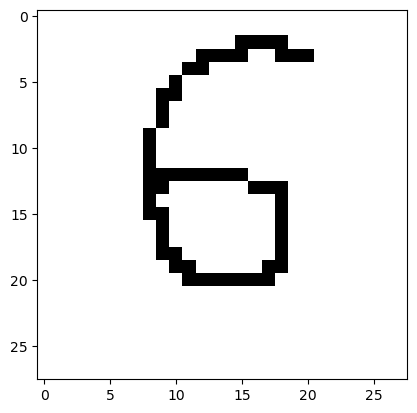

1/1 [==============================] - 0s 15ms/step
The number is probably a: 7
confidence (0 to 1):  1.0


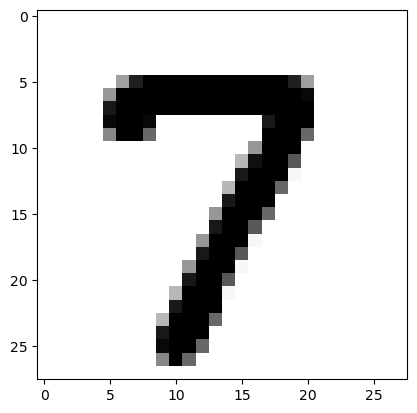

1/1 [==============================] - 0s 14ms/step
The number is probably a: 8
confidence (0 to 1):  1.0


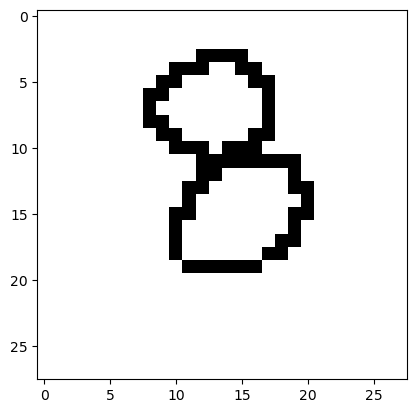

1/1 [==============================] - 0s 20ms/step
The number is probably a: 9
confidence (0 to 1):  1.0


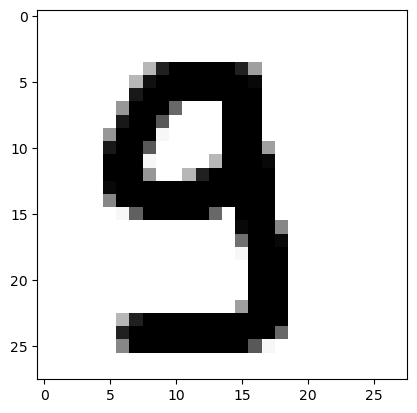

In [9]:
image_number=1
#use images from folder
while os.path.isfile('TestImages/'+str(image_number)+'.png'):
    try:
        img=cv2.imread('TestImages/'+str(image_number)+'.png')[:,:,0]
        img=np.invert(np.array([img]))
        prediction=model.predict(img)
        print('The number is probably a: '+str(np.argmax(prediction)))
        #print confidence of all classes
        print('confidence (0 to 1): ',np.max(prediction))
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except:
        print('Error')
    image_number+=1